# Homework 6
#### By: Khrystyna Kubatska

## Ідентифікація та опис проблеми у даній візуалізації даних 

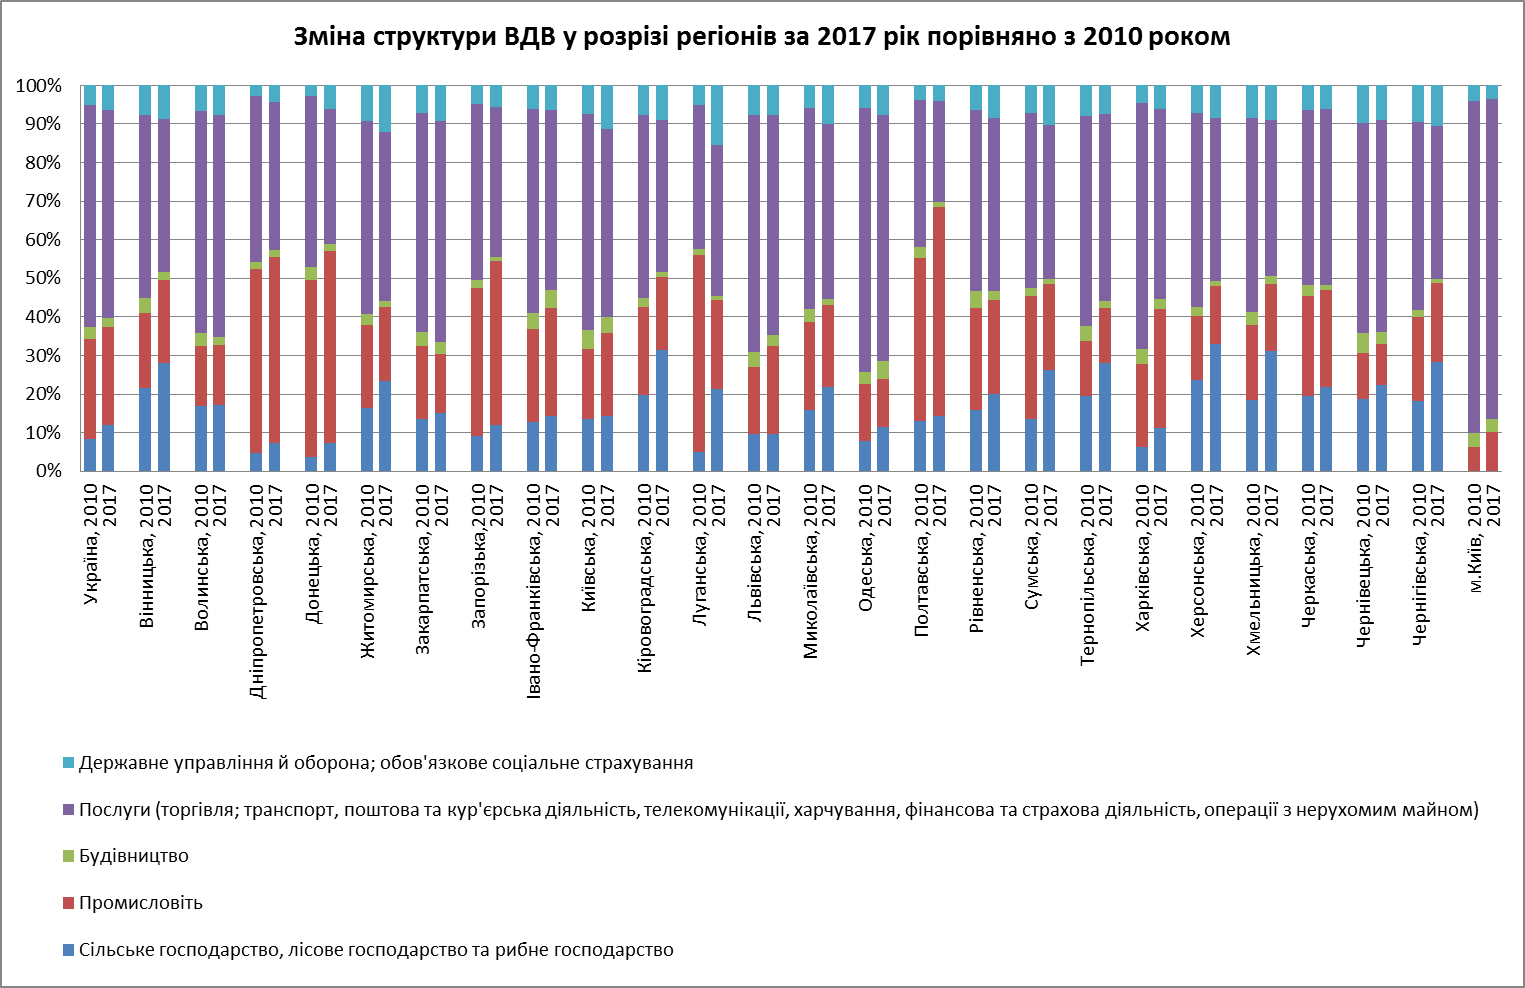

In [1]:
from IPython.display import Image
Image(filename='initial_visualisation.png') 

З заголовку можна зробити висновок, що метою цієї візуалізції було відобразити зміну структури ВДВ у 2017 році порівняно з 2010 роком.   
Проте ця візуалізація декілька проблем, що взагальному впливають на її читабельність та розуміння:
 - велика кількість стовпчиків, кожен з яких поділений на 5 частин, відповідно до кожної галузі;
 - відсутність впорядкування самих стовпчиків та частин з яких вони складаються;
 - важко порівнювати значення галузей для кількох стовпчиків, зокрема і зміну структур, через нерівномірність їх початків.

## Альтернативний варіант презентації цих даних

In [2]:
import altair as alt
import pandas as pd
import geopandas as gpd
import copy

In [3]:
df = pd.read_csv('1.4_02.csv')
df.drop(['Регіон, рік'], axis = 1, inplace = True)
df.head()

,регіон,рік,сільське господарство,промисловість,будівництво,послуги,державне управління
0,Україна,2010,8.3,25.9,3.3,57.3,5.2
1,Україна,2017,12.1,25.2,2.5,53.7,6.5
2,Вінницька,2010,21.6,19.3,4.1,47.4,7.6
3,Вінницька,2017,28.1,21.4,2.0,39.8,8.7
4,Волинська,2010,16.9,15.6,3.2,57.7,6.6


In [4]:
df_sg, df_pr, df_bd, df_ps, df_dp = df.copy(), df.copy(), df.copy(), df.copy(), df.copy()

df_sg.drop(['промисловість','будівництво','послуги','державне управління'], axis = 1, inplace = True)
df_sg['галузь'] = 'сільське господарство' 
df_sg.columns = ['регіон','рік','частка','галузь']

df_pr.drop(['сільське господарство','будівництво','послуги','державне управління'], axis = 1, inplace = True)
df_pr['галузь'] = 'промисловість' 
df_pr.columns = ['регіон','рік','частка','галузь']

df_bd.drop(['сільське господарство','промисловість','послуги','державне управління'], axis = 1, inplace = True)
df_bd['галузь'] = 'будівництво' 
df_bd.columns = ['регіон','рік','частка','галузь']

df_ps.drop(['сільське господарство','промисловість','будівництво','державне управління'], axis = 1, inplace = True)
df_ps['галузь'] = 'послуги' 
df_ps.columns = ['регіон','рік','частка','галузь']

df_dp.drop(['сільське господарство','промисловість','послуги','будівництво'], axis = 1, inplace = True)
df_dp['галузь'] = 'державне управління' 
df_dp.columns = ['регіон','рік','частка','галузь']

In [8]:
# df_2 = pd.concat([df_sg, df_pr, df_bd, df_ps, df_dp], ignore_index=True)
# df_2

In [6]:
df_list = [df_sg, df_pr, df_bd, df_ps, df_dp]
name_list = ['Сільське господарство','Промисловість','Будівництво','Послуги','Державне управління']
chart_list = []


for i in range(len(df_list)):
    df_i = df_list[i]
    
    lines = alt.Chart(df_i).mark_line().encode(
        x = alt.X('max(частка):Q'),
        x2 = alt.X2('min(частка):Q'),
        y = alt.Y('регіон:N', 
                  sort=alt.Sort(field='частка', op='max', order='descending'))
        )

    points = alt.Chart(df_i).mark_circle(size = 100).encode(
        x = alt.X('частка:Q', title = "Частка, %"),
        y = alt.Y('регіон:N',  title = 'Регіон', 
                  sort=alt.Sort(field='частка', op='max', order='descending')),
        color  = alt.Color('рік:N', title = "Рік"),
        tooltip = [ alt.Tooltip('регіон:N', title = 'Регіон'),
                    alt.Tooltip('рік:N', title = 'Рік' ),
                    alt.Tooltip('частка:Q', title = 'Частка' ) ]
    )

    chart = alt.layer(lines, points
                     ).properties(width = 400, height = 500,
                                  title = { "text": 'Структура ВДВ у 2017 році порівняно з 2010 роком', 
                                            "subtitle": name_list[i],
                                            "subtitleFontSize": 14,
                                            "subtitleFontWeight": 'bold'}          
                     )  
    
    chart_list.append(chart)

In [7]:
alt.hconcat(chart_list[0],  
            chart_list[1],
            chart_list[2], 
            chart_list[3],  
            chart_list[4],
            resolve = alt.Resolve(scale=alt.LegendResolveMap(color=alt.ResolveMode('independent')))
    ).configure_legend(titleFontSize=14, labelFontSize=13
    ).configure_axis(titleFontSize=14, labelFontSize = 12
    ).configure_title(fontSize=17
    )

alt.HConcatChart(...)

Для презентації цих даних я вибрала гентелькові графіки для кожної з галузей.  
По осі Y розміщені регіони, а по осі Х - відсоткова частка конкретної галузі для регіону у 2010 та 2017 роках. Значення по роках різняться по кольору.  Регіони посортовані у низхідному порядку по найбільшому значенні частки.
Також для зручності додані спливаючі віконця з назвою регіону, відсотковою часткою та роком.

Перевагами цієї візуалізаціїї порівняно з початковою є:
 - відносна легкість порівняння всіх регіонів між собою;
 - відносна легкість відстежування змін для галузей для кожного регіону;
 - можливість побачити конкретні дані завдяки спливаючим віконцям.
 
Недоліком цієї візуалізації є відсутність можливості побачити розподіл між частками галузей для регіонів одночасно (на одному графіку).
 